In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report

#### Problem statement

#### Data gathering


In [2]:
df = pd.read_csv(r"C:\machine learning\Bank marketing.csv")
df
                 

age          job   marital            education  default housing loan  \
0      48   technician   married  professional.course      yes      no   no   
1      42       admin.   married          high.school       no      no   no   
2      71       admin.   married             basic.4y       no     yes  yes   
3      39  blue-collar   married             basic.9y       no     yes   no   
4      67      retired   married  professional.course       no      no   no   
...   ...          ...       ...                  ...      ...     ...  ...   
4113   37     services  divorced             basic.6y       no      no   no   
4114   45       admin.   married    university.degree       no      no   no   
4115   60      retired   married          high.school       no      no   no   
4116   49  blue-collar   married          high.school  unknown     yes   no   
4117   46   technician   married          high.school       no      no   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
0      cellular   aug         tue  ...         1    999         0   
1      cellular   nov         mon  ...         2    999         1   
2      cellular   may         fri  ...         4      3         2   
3     telephone   oct         fri  ...         1    999         0   
4     telephone   oct         mon  ...         2    999         0   
...         ...   ...         ...  ...       ...    ...       ...   
4113   cellular   nov         thu  ...         2    999         0   
4114   cellular   jul         thu  ...         1    999         0   
4115   cellular   sep         wed  ...         1    999         0   
4116   cellular   nov         mon  ...         1    999         0   
4117   cellular   may         mon  ...         5      3         1   

         poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent          1.4          93.444          -36.1      4.963   
1         failure         -0.1          93.200          -42.0      4.191   
2         success         -1.8          93.876          -40.0      0.684   
3     nonexistent         -0.1          93.798          -40.4      4.918   
4     nonexistent         -3.4          92.431          -26.9      0.739   
...           ...          ...             ...            ...        ...   
4113  nonexistent         -0.1          93.200          -42.0      4.076   
4114  nonexistent         -2.9          92.469          -33.6      1.072   
4115  nonexistent         -1.1          94.199          -37.5      0.876   
4116  nonexistent         -0.1          93.200          -42.0      4.191   
4117      success         -1.8          92.893          -46.2      1.354   

      nr.employed    y  
0          5228.1   no  
1          5195.8  yes  
2          5008.7  yes  
3          5195.8  yes  
4          5017.5   no  
...           ...  ...  
4113       5195.8   no  
4114       5076.2  yes  
4115       4963.6  yes  
4116       5195.8   no  
4117       5099.1   no  

[4118 rows x 21 columns]

#### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4118 non-null   int64  
 1   job             4118 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4118 non-null   object 
 5   housing         4118 non-null   object 
 6   loan            4118 non-null   object 
 7   contact         4118 non-null   object 
 8   month           4118 non-null   object 
 9   day_of_week     4118 non-null   object 
 10  duration        4118 non-null   int64  
 11  campaign        4118 non-null   int64  
 12  pdays           4118 non-null   int64  
 13  previous        4118 non-null   int64  
 14  poutcome        4118 non-null   object 
 15  emp.var.rate    4118 non-null   float64
 16  cons.price.idx  4118 non-null   float64
 17  cons.conf.idx   4118 non-null   f

In [4]:
df.shape

(4118, 21)

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

age     duration     campaign        pdays     previous  \
count  4118.00000  4118.000000  4118.000000  4118.000000  4118.000000   
mean     40.35017   383.201797     2.307188   888.314230     0.316659   
std      11.96551   358.455961     2.256688   312.552613     0.698567   
min      17.00000     4.000000     1.000000     0.000000     0.000000   
25%      31.00000   143.000000     1.000000   999.000000     0.000000   
50%      38.00000   260.000000     2.000000   999.000000     0.000000   
75%      48.00000   522.000000     3.000000   999.000000     0.000000   
max      98.00000  3631.000000    32.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4118.000000     4118.000000    4118.000000  4118.000000  4118.000000  
mean      -0.505804       93.475465     -40.265857     2.945781  5134.785648  
std        1.711502        0.623478       5.331657     1.886556    86.847482  
min       -3.400000       92.201000     -50.800000     0.634000  4963.600000  
25%       -1.800000       92.893000     -42.700000     1.244000  5076.200000  
50%       -1.100000       93.444000     -41.800000     1.799000  5099.100000  
75%        1.400000       93.994000     -36.400000     4.958000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

#### Feature Engineering

In [7]:
label_encoder = preprocessing.LabelEncoder()
  
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['day_of_week']= label_encoder.fit_transform(df['day_of_week'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['y']= label_encoder.fit_transform(df['y'])





In [8]:
df.drop("day_of_week",axis =1)

age  job  marital  education  default  housing  loan  contact  month  \
0      48    9        1          5        2        0     0        0      1   
1      42    0        1          3        0        0     0        0      7   
2      71    0        1          0        0        2     2        0      6   
3      39    1        1          2        0        2     0        1      8   
4      67    5        1          5        0        0     0        1      8   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4113   37    7        0          1        0        0     0        0      7   
4114   45    0        1          6        0        0     0        0      3   
4115   60    5        1          3        0        0     0        0      9   
4116   49    1        1          3        1        2     0        0      7   
4117   46    9        1          3        0        0     0        0      6   

      duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0           66         1    999         0         1           1.4   
1          651         2    999         1         0          -0.1   
2          466         4      3         2         2          -1.8   
3          112         1    999         0         1          -0.1   
4          270         2    999         0         1          -3.4   
...        ...       ...    ...       ...       ...           ...   
4113       667         2    999         0         1          -0.1   
4114       252         1    999         0         1          -2.9   
4115      1640         1    999         0         1          -1.1   
4116        80         1    999         0         1          -0.1   
4117        60         5      3         1         2          -1.8   

      cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0             93.444          -36.1      4.963       5228.1  0  
1             93.200          -42.0      4.191       5195.8  1  
2             93.876          -40.0      0.684       5008.7  1  
3             93.798          -40.4      4.918       5195.8  1  
4             92.431          -26.9      0.739       5017.5  0  
...              ...            ...        ...          ... ..  
4113          93.200          -42.0      4.076       5195.8  0  
4114          92.469          -33.6      1.072       5076.2  1  
4115          94.199          -37.5      0.876       4963.6  1  
4116          93.200          -42.0      4.191       5195.8  0  
4117          92.893          -46.2      1.354       5099.1  0  

[4118 rows x 20 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4118 entries, 0 to 4117
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4118 non-null   int64  
 1   job             4118 non-null   int32  
 2   marital         4118 non-null   int32  
 3   education       4118 non-null   int32  
 4   default         4118 non-null   int32  
 5   housing         4118 non-null   int32  
 6   loan            4118 non-null   int32  
 7   contact         4118 non-null   int64  
 8   month           4118 non-null   int32  
 9   day_of_week     4118 non-null   int32  
 10  duration        4118 non-null   int64  
 11  campaign        4118 non-null   int64  
 12  pdays           4118 non-null   int64  
 13  previous        4118 non-null   int64  
 14  poutcome        4118 non-null   int32  
 15  emp.var.rate    4118 non-null   float64
 16  cons.price.idx  4118 non-null   float64
 17  cons.conf.idx   4118 non-null   f


#### Feature selection

In [10]:
#linearity

In [11]:
df.corr()

age       job   marital  education   default   housing  \
age             1.000000 -0.002409 -0.425422  -0.146816  0.112334  0.014776   
job            -0.002409  1.000000  0.031325   0.069783 -0.023845  0.002587   
marital        -0.425422  0.031325  1.000000   0.126918 -0.093399  0.027833   
education      -0.146816  0.069783  0.126918   1.000000 -0.151708 -0.003977   
default         0.112334 -0.023845 -0.093399  -0.151708  1.000000 -0.010758   
housing         0.014776  0.002587  0.027833  -0.003977 -0.010758  1.000000   
loan           -0.010921 -0.003743  0.002940   0.014813  0.016415  0.050745   
contact        -0.013227 -0.056547 -0.058028  -0.124218  0.183643 -0.083301   
month          -0.019150 -0.027105  0.008453  -0.072955 -0.011404 -0.036101   
day_of_week    -0.010933 -0.020420 -0.009738  -0.039343 -0.037477  0.002363   
duration        0.005834 -0.003923  0.004443  -0.024336  0.013121 -0.015192   
campaign        0.011163 -0.015963 -0.038670  -0.035512  0.065528 -0.002979   
pdays          -0.063067 -0.042512 -0.046766  -0.063558  0.122897 -0.002619   
previous        0.073240  0.040154  0.029043   0.065736 -0.135270  0.011164   
poutcome        0.017801  0.013107  0.047158   0.028705 -0.025064 -0.016922   
emp.var.rate   -0.050321 -0.033916 -0.091841  -0.091237  0.275276 -0.055964   
cons.price.idx -0.007546 -0.023582 -0.048064  -0.072222  0.171948 -0.065123   
cons.conf.idx   0.132429  0.041079 -0.025121   0.066313  0.006014 -0.042518   
euribor3m      -0.052888 -0.037490 -0.095545  -0.091833  0.274584 -0.056958   
nr.employed    -0.087067 -0.047730 -0.087128  -0.099040  0.265463 -0.037254   
y               0.049769  0.043510  0.084760   0.092964 -0.175659  0.004432   

                    loan   contact     month  day_of_week  ...  campaign  \
age            -0.010921 -0.013227 -0.019150    -0.010933  ...  0.011163   
job            -0.003743 -0.056547 -0.027105    -0.020420  ... -0.015963   
marital         0.002940 -0.058028  0.008453    -0.009738  ... -0.038670   
education       0.014813 -0.124218 -0.072955    -0.039343  ... -0.035512   
default         0.016415  0.183643 -0.011404    -0.037477  ...  0.065528   
housing         0.050745 -0.083301 -0.036101     0.002363  ... -0.002979   
loan            1.000000 -0.018820  0.030264     0.009399  ...  0.018649   
contact        -0.018820  1.000000  0.187770     0.006510  ...  0.091225   
month           0.030264  0.187770  1.000000     0.005620  ... -0.060037   
day_of_week     0.009399  0.006510  0.005620     1.000000  ... -0.034317   
duration        0.001978 -0.028619 -0.025705     0.013538  ... -0.026167   
campaign        0.018649  0.091225 -0.060037    -0.034317  ...  1.000000   
pdays          -0.003887  0.157838 -0.101267    -0.031996  ...  0.077691   
previous       -0.014093 -0.217991  0.122254     0.030900  ... -0.094846   
poutcome        0.020680  0.029098  0.011332     0.037964  ... -0.000884   
emp.var.rate    0.005087  0.418740 -0.148910     0.006610  ...  0.180624   
cons.price.idx -0.001062  0.478093  0.015227     0.022509  ...  0.121671   
cons.conf.idx  -0.027413  0.162675  0.074212     0.022596  ... -0.035025   
euribor3m       0.004010  0.439054 -0.105092     0.001422  ...  0.168272   
nr.employed     0.007513  0.334335 -0.216937    -0.014112  ...  0.169426   
y              -0.019627 -0.233756 -0.011540     0.026365  ... -0.117414   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age            -0.063067  0.073240  0.017801     -0.050321       -0.007546   
job            -0.042512  0.040154  0.013107     -0.033916       -0.023582   
marital        -0.046766  0.029043  0.047158     -0.091841       -0.048064   
education      -0.063558  0.065736  0.028705     -0.091237       -0.072222   
default         0.122897 -0.135270 -0.025064      0.275276        0.171948   
housing        -0.002619  0.011164 -0.016922     -0.055964       -0.065123   
loan           -0.003887 -0.014093  0.020680      0.005087     

<Axes: >

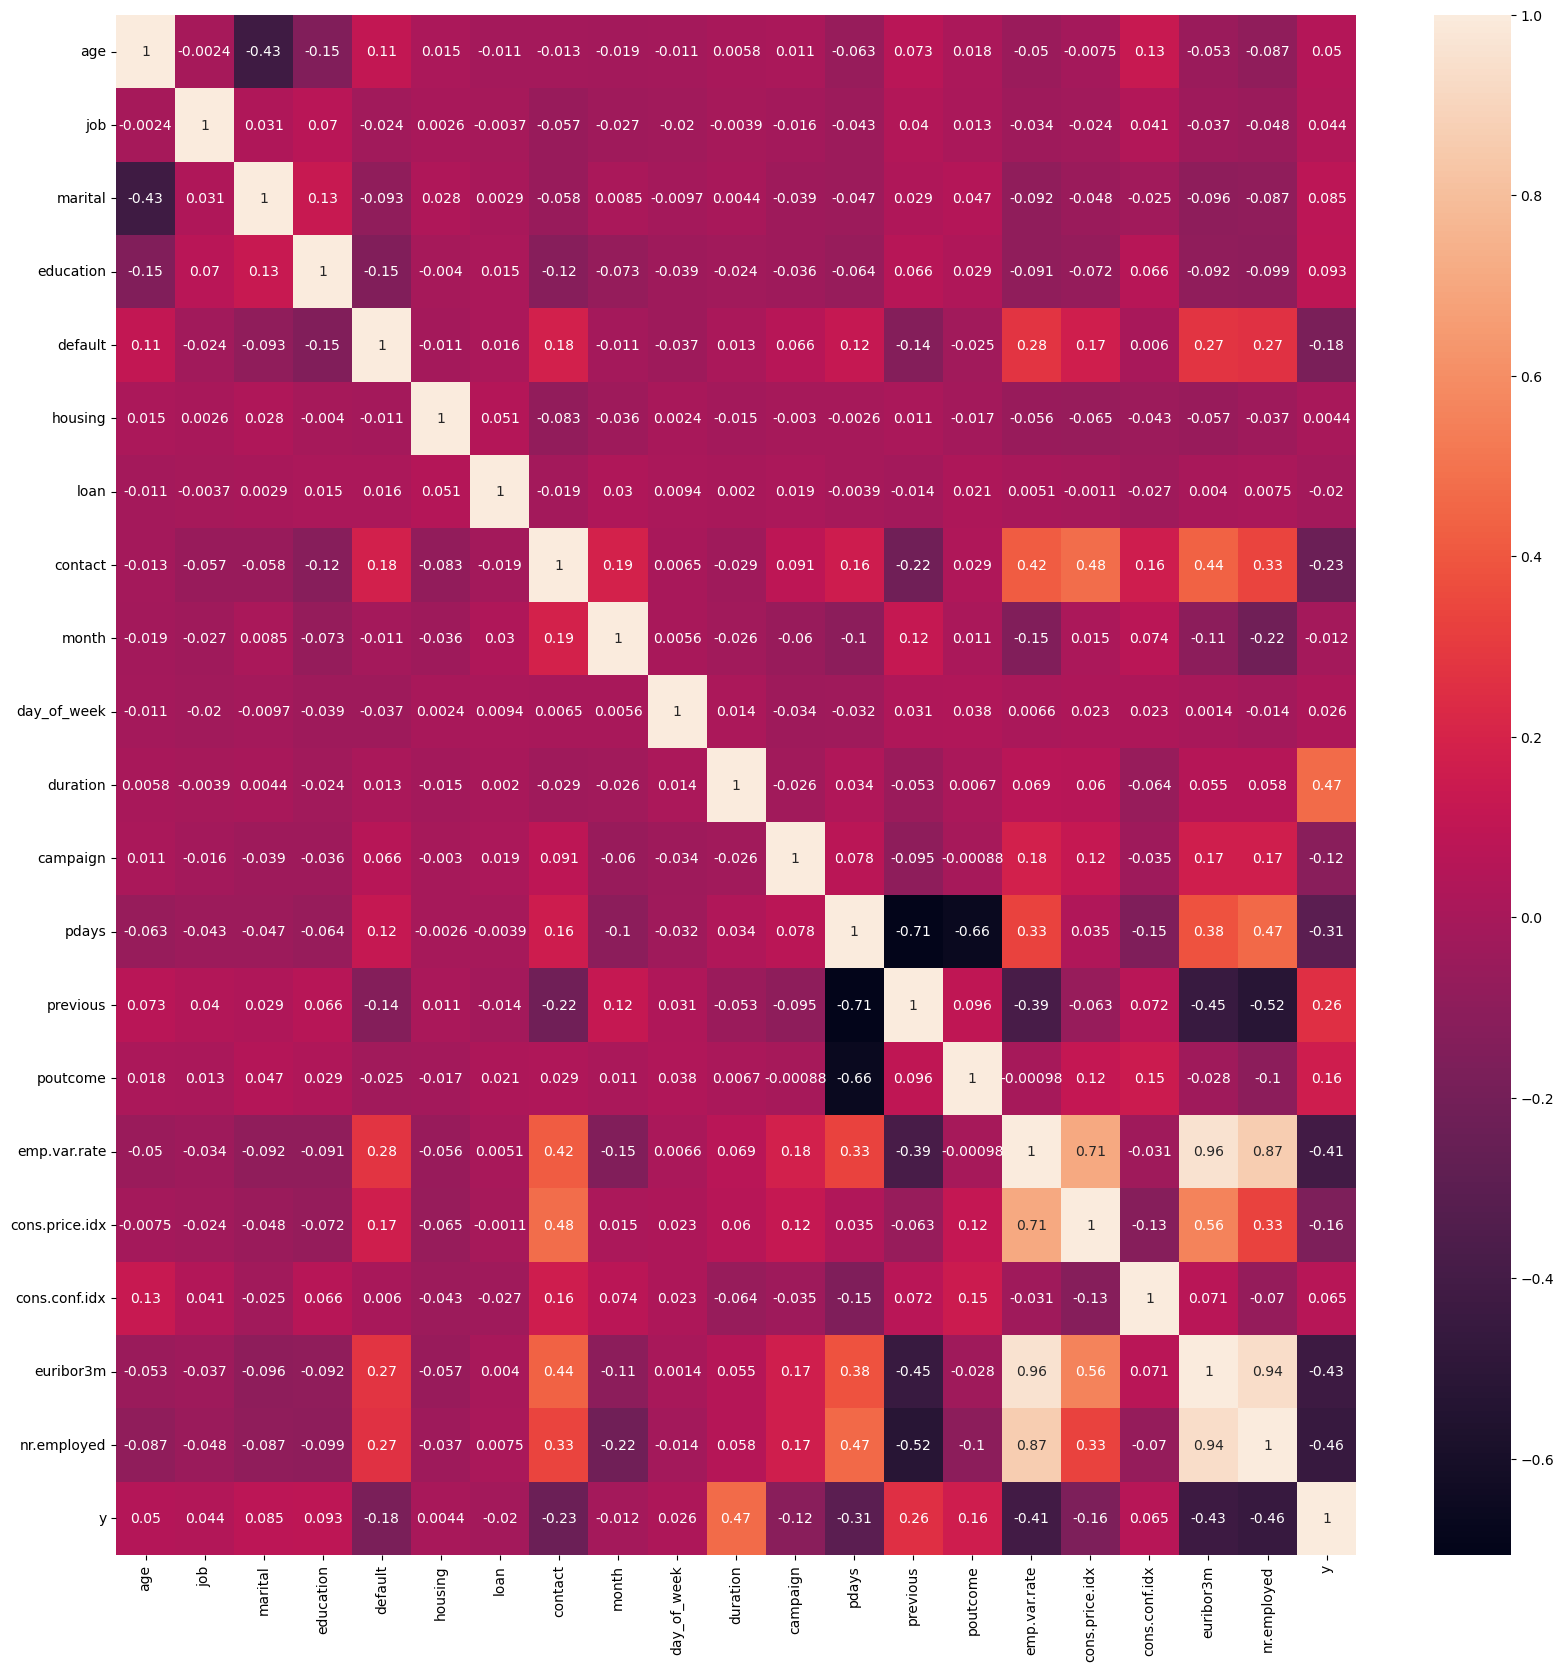

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

In [13]:
#categorical column y

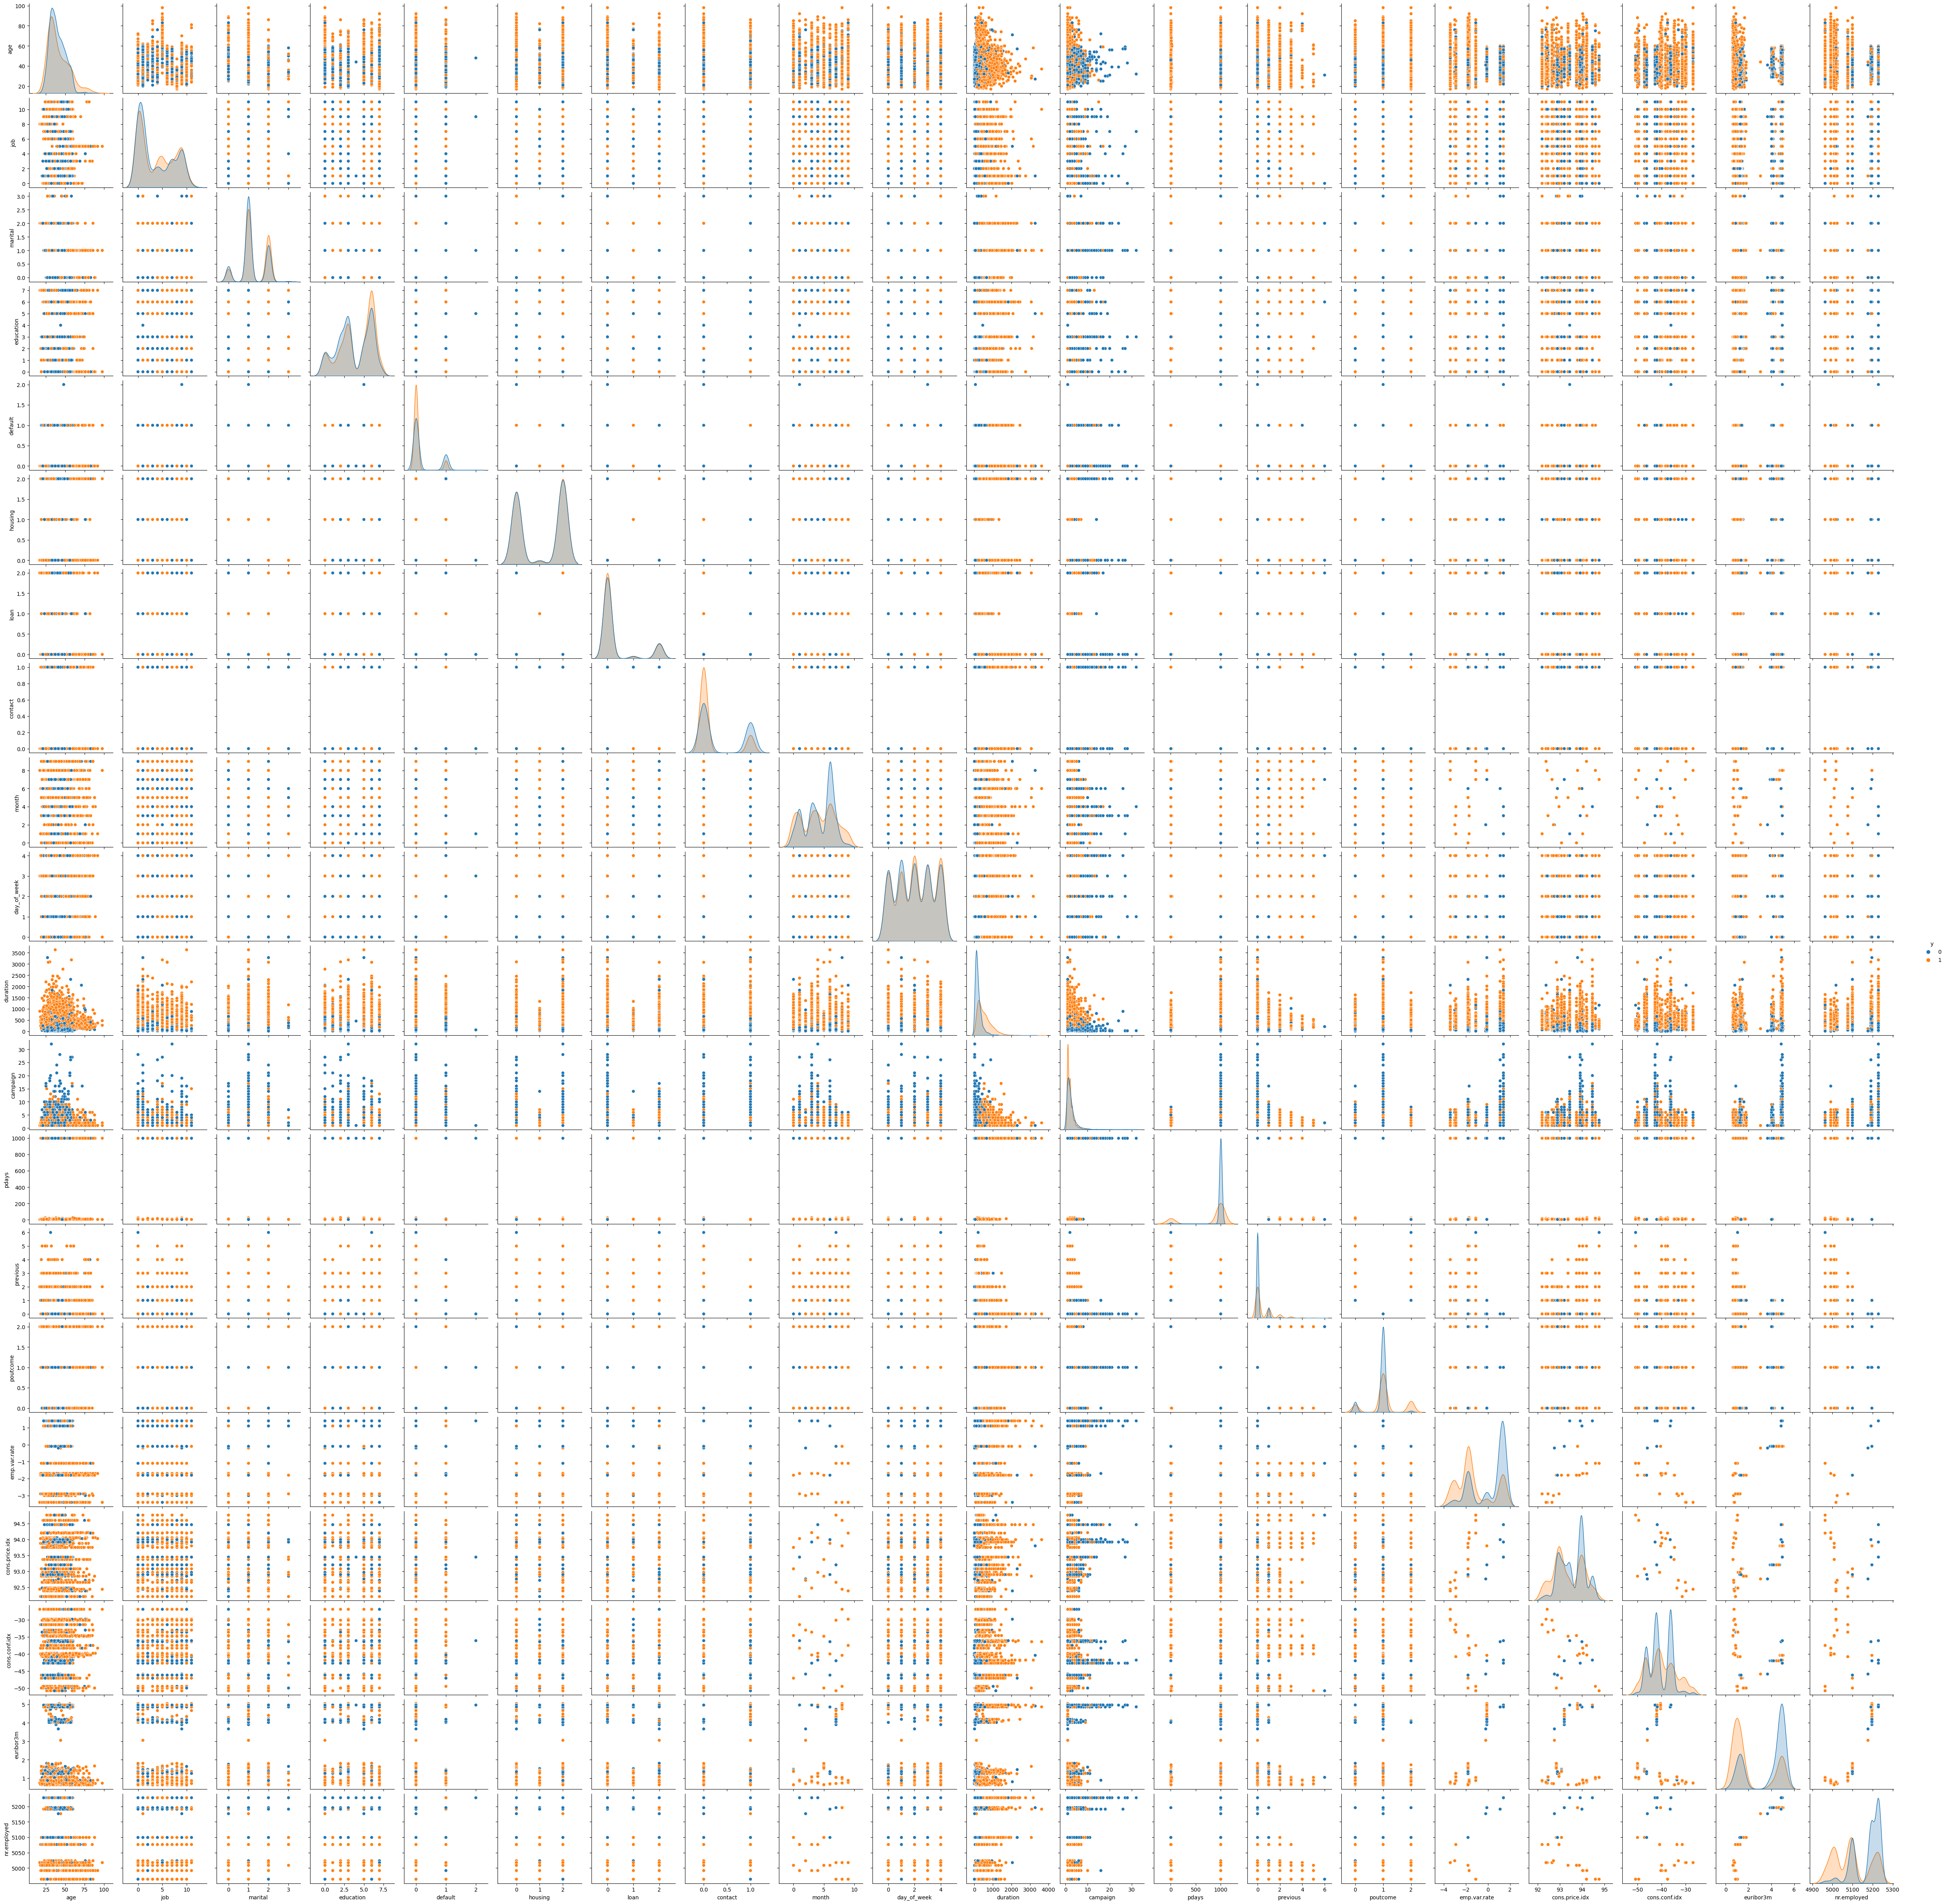

In [14]:
sns.pairplot(df,hue ="y")

In [15]:
df["y"].value_counts()

0    2059
1    2059
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

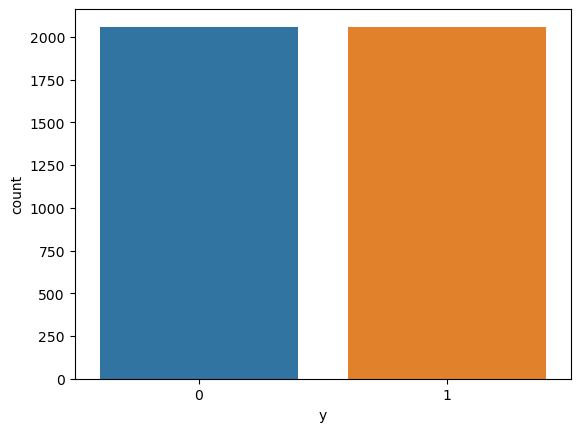

In [16]:
sns.countplot(x = df["y"])

In [17]:
#no multicolinearity

In [18]:
df1 = df.drop(["y"],axis =1)
df1

age  job  marital  education  default  housing  loan  contact  month  \
0      48    9        1          5        2        0     0        0      1   
1      42    0        1          3        0        0     0        0      7   
2      71    0        1          0        0        2     2        0      6   
3      39    1        1          2        0        2     0        1      8   
4      67    5        1          5        0        0     0        1      8   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4113   37    7        0          1        0        0     0        0      7   
4114   45    0        1          6        0        0     0        0      3   
4115   60    5        1          3        0        0     0        0      9   
4116   49    1        1          3        1        2     0        0      7   
4117   46    9        1          3        0        0     0        0      6   

      day_of_week  duration  campaign  pdays  previous  poutcome  \
0               3        66         1    999         0         1   
1               1       651         2    999         1         0   
2               0       466         4      3         2         2   
3               0       112         1    999         0         1   
4               1       270         2    999         0         1   
...           ...       ...       ...    ...       ...       ...   
4113            2       667         2    999         0         1   
4114            2       252         1    999         0         1   
4115            4      1640         1    999         0         1   
4116            1        80         1    999         0         1   
4117            1        60         5      3         1         2   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              1.4          93.444          -36.1      4.963       5228.1  
1             -0.1          93.200          -42.0      4.191       5195.8  
2             -1.8          93.876          -40.0      0.684       5008.7  
3             -0.1          93.798          -40.4      4.918       5195.8  
4             -3.4          92.431          -26.9      0.739       5017.5  
...            ...             ...            ...        ...          ...  
4113          -0.1          93.200          -42.0      4.076       5195.8  
4114          -2.9          92.469          -33.6      1.072       5076.2  
4115          -1.1          94.199          -37.5      0.876       4963.6  
4116          -0.1          93.200          -42.0      4.191       5195.8  
4117          -1.8          92.893          -46.2      1.354       5099.1  

[4118 rows x 20 columns]

In [19]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_df

Features
0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12           pdays
13        previous
14        poutcome
15    emp.var.rate
16  cons.price.idx
17   cons.conf.idx
18       euribor3m
19     nr.employed

In [20]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list

[16.25464411633448,
 2.1365427907077246,
 6.114961966911389,
 4.665947391189954,
 1.357362616998724,
 2.225227306390417,
 1.2068163440764013,
 2.13780052777312,
 5.165852517879838,
 3.1867947869039424,
 2.1790447513972397,
 2.135216261843374,
 67.74380535001372,
 5.07376355496393,
 20.30550923560098,
 33.552906797042375,
 23413.970000283633,
 90.04518622614216,
 174.9409945033143,
 27131.043754054364]

In [21]:

vif_df["VIF"] = vif_list
vif_df

Features           VIF
0              age     16.254644
1              job      2.136543
2          marital      6.114962
3        education      4.665947
4          default      1.357363
5          housing      2.225227
6             loan      1.206816
7          contact      2.137801
8            month      5.165853
9      day_of_week      3.186795
10        duration      2.179045
11        campaign      2.135216
12           pdays     67.743805
13        previous      5.073764
14        poutcome     20.305509
15    emp.var.rate     33.552907
16  cons.price.idx  23413.970000
17   cons.conf.idx     90.045186
18       euribor3m    174.940995
19     nr.employed  27131.043754

In [22]:
x = df.drop("y",axis=1)
y = df["y"]

In [23]:
#train,test,split

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

#### Model training


In [69]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [26]:
#Training data

In [27]:
y_pred_train = log_reg_model.predict(xtrain)


In [28]:
accuracy = accuracy_score(ytrain,y_pred_train)
print(f"Accuracy : {accuracy}")


multi_confusion_matrix = multilabel_confusion_matrix(ytrain,y_pred_train)
print(multi_confusion_matrix)


class_report = classification_report(ytrain,y_pred_train)
print(class_report)


Accuracy : 0.8673345476624165
[[[1441  196]
  [ 241 1416]]

 [[1416  241]
  [ 196 1441]]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1657
           1       0.86      0.88      0.87      1637

    accuracy                           0.87      3294
   macro avg       0.87      0.87      0.87      3294
weighted avg       0.87      0.87      0.87      3294



In [29]:
#Testing data

In [30]:
y_pred_test = log_reg_model.predict(xtest)
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")


multi_confusion_matrix = multilabel_confusion_matrix(ytest,y_pred_test)
print(multi_confusion_matrix)


class_report = classification_report(ytest,y_pred_test)
print(class_report)


Accuracy : 0.8398058252427184
[[[344  78]
  [ 54 348]]

 [[348  54]
  [ 78 344]]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       402
           1       0.86      0.82      0.84       422

    accuracy                           0.84       824
   macro avg       0.84      0.84      0.84       824
weighted avg       0.84      0.84      0.84       824



In [31]:
#confusion matrix

<Axes: >

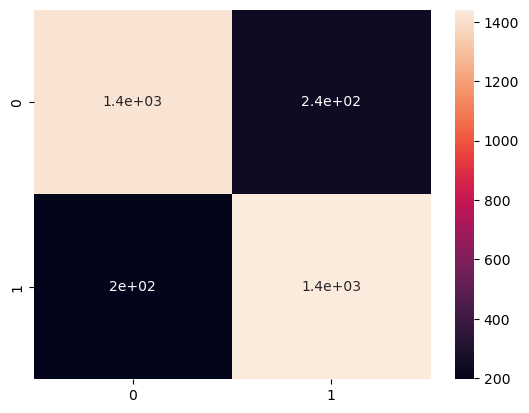

In [32]:
conf_matrix = confusion_matrix(ytrain,y_pred_train)
sns.heatmap(conf_matrix,annot=True)

#### Decision Tree classifier

In [33]:
Dt_clf = DecisionTreeClassifier()
Dt_clf

DecisionTreeClassifier()

In [34]:
Dt_clf_model = Dt_clf.fit(xtrain,ytrain)
Dt_clf_model

DecisionTreeClassifier()

#### Training data

In [35]:
y_pred_train = Dt_clf_model.predict(xtrain)

In [36]:
accuracy_score(ytrain,y_pred_train)

1.0

In [37]:
#confusion matrix

<Axes: >

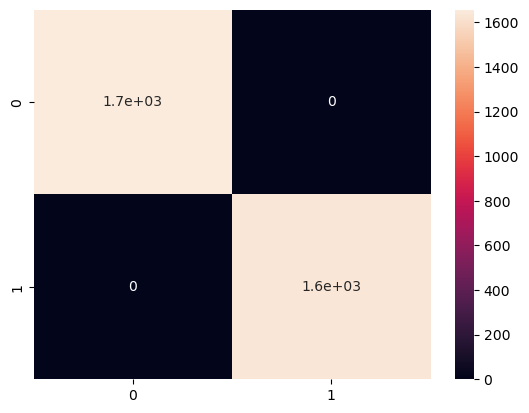

In [38]:
sns.heatmap(confusion_matrix(ytrain,y_pred_train),annot = True)

In [39]:
#classification report


In [40]:
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1657
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294



#### Testing data

In [41]:
y_pred_test = Dt_clf_model.predict(xtest)

In [42]:
accuracy_score(ytest,y_pred_test)

0.8385922330097088

In [43]:
#confusion matrix

In [44]:
confusion_matrix(ytest,y_pred_test)

array([[348,  54],
       [ 79, 343]], dtype=int64)

In [45]:
#classification report

In [46]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       402
           1       0.86      0.81      0.84       422

    accuracy                           0.84       824
   macro avg       0.84      0.84      0.84       824
weighted avg       0.84      0.84      0.84       824



In [47]:
hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [48]:
grid_model  = RandomizedSearchCV(Dt_clf_model,hyperparameters,cv=5)

In [49]:
grid_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [50]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=12, min_samples_split=12)

In [51]:
hyp_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=13)

In [52]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=13)

In [53]:
ypred_train = hyp_dt_model.predict(xtrain)

Accuracy = 0.8758348512446873
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1657
           1       0.84      0.92      0.88      1637

    accuracy                           0.88      3294
   macro avg       0.88      0.88      0.88      3294
weighted avg       0.88      0.88      0.88      3294

Axes(0.125,0.11;0.62x0.77)


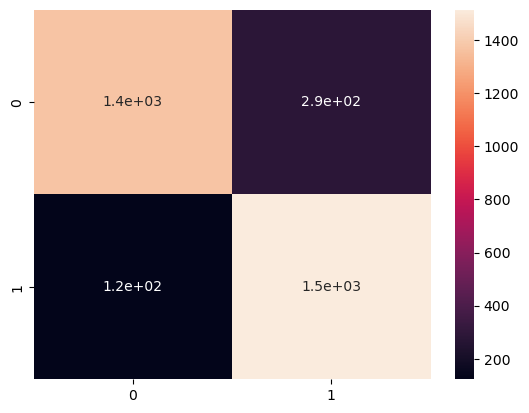

In [54]:
#Training

print(f"Accuracy = {accuracy_score(ytrain,ypred_train)}")
print(classification_report(ytrain,ypred_train))
print(sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True))

In [55]:
#testing

ypred_test = hyp_dt_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
print(confusion_matrix(ytest,ypred_test))
print(classification_report(ypred_test,ytest))

Accuracy = 0.8567961165048543
[[341  61]
 [ 57 365]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       398
           1       0.86      0.86      0.86       426

    accuracy                           0.86       824
   macro avg       0.86      0.86      0.86       824
weighted avg       0.86      0.86      0.86       824



[Text(0.5, 0.875, 'duration <= 392.5\nentropy = 1.0\nsamples = 3294\nvalue = [1657, 1637]\nclass = age'), Text(0.25, 0.625, 'nr.employed <= 5087.65\nentropy = 0.907\nsamples = 2151\nvalue = [1457, 694]\nclass = age'), Text(0.125, 0.375, 'duration <= 125.5\nentropy = 0.671\nsamples = 648\nvalue = [114, 534]\nclass = job'), Text(0.0625, 0.125, 'entropy = 0.941\nsamples = 81\nvalue = [52, 29]\nclass = age'), Text(0.1875, 0.125, 'entropy = 0.498\nsamples = 567\nvalue = [62, 505]\nclass = job'), Text(0.375, 0.375, 'cons.conf.idx <= -46.65\nentropy = 0.489\nsamples = 1503\nvalue = [1343, 160]\nclass = age'), Text(0.3125, 0.125, 'entropy = 0.997\nsamples = 206\nvalue = [96, 110]\nclass = job'), Text(0.4375, 0.125, 'entropy = 0.236\nsamples = 1297\nvalue = [1247, 50]\nclass = age'), Text(0.75, 0.625, 'duration <= 549.5\nentropy = 0.669\nsamples = 1143\nvalue = [200, 943]\nclass = job'), Text(0.625, 0.375, 'emp.var.rate <= 0.5\nentropy = 0.888\nsamples = 360\nvalue = [110, 250]\nclass = job'), 

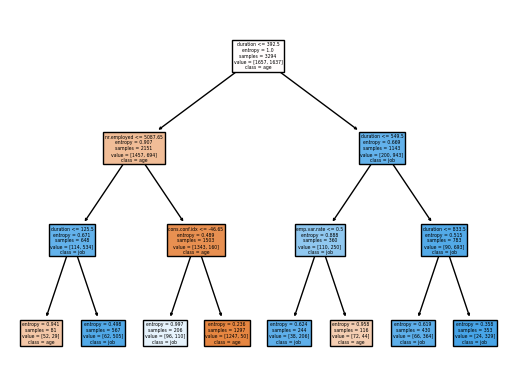

In [56]:
print(plot_tree(hyp_dt_model,class_names=df.columns,feature_names=df.columns,filled=True))

#### Random forest / Hyperparameters


In [57]:
Rf_clf = RandomForestClassifier()
Rf_clf

RandomForestClassifier()

In [58]:
Rf_clf_model = Rf_clf.fit(xtrain,ytrain)
Rf_clf_model

RandomForestClassifier()

In [59]:
#Training data

In [60]:
y_pred_train = Rf_clf_model.predict(xtrain)

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1657
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294



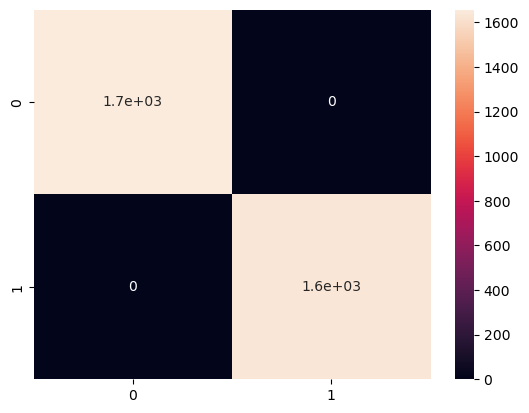

In [61]:
print("Accuracy = ",accuracy_score(ytrain,y_pred_train))
sns.heatmap(confusion_matrix(ytrain,y_pred_train),annot= True)
print(classification_report(ytrain,y_pred_train))

In [62]:
#Testing

Accuracy =  0.8762135922330098
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       402
           1       0.87      0.89      0.88       422

    accuracy                           0.88       824
   macro avg       0.88      0.88      0.88       824
weighted avg       0.88      0.88      0.88       824



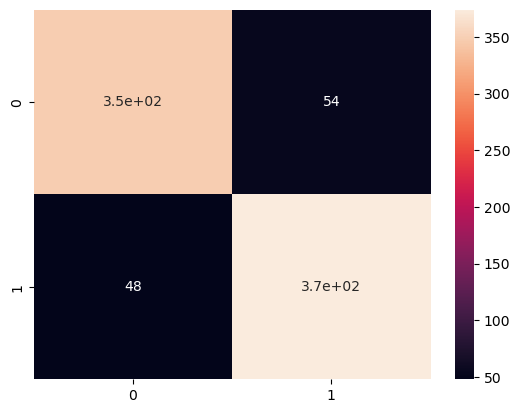

In [63]:
y_pred_test = Rf_clf_model.predict(xtest)
ypred_test = Rf_clf_model.predict(xtest)
print("Accuracy = ",accuracy_score(ytest,ypred_test))
sns.heatmap(confusion_matrix(ytest,ypred_test),annot = True)
print(classification_report(ytest,ypred_test))

In [71]:
Rf_clf =  RandomForestClassifier(random_state=10)

HyperP = {
    
    "n_estimators":np.arange(10,200),
    "criterion":['gini','entropy'],
    "max_depth":np.arange(5,15),
    "min_samples_split": np.arange(5,20),
    "min_samples_leaf":np.arange(4,15),
    "max_features":["auto"]
    
    
}

rscv_Rf_clf = RandomizedSearchCV(Rf_clf_model,HyperP,cv = 6)
rscv_Rf_clf.fit(xtrain,ytrain)
rscv_Rf_clf.best_estimator_
warnings.filterwarnings("ignore")

In [72]:
Rf_clf = RandomForestClassifier(criterion='entropy',max_depth = 13,max_features = 'auto',min_samples_leaf = 10,
                               min_samples_split = 7,n_estimators = 135,random_state=10)
Rf_clf

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=10, min_samples_split=7,
                       n_estimators=135, random_state=10)

In [73]:
Rf_clf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=10, min_samples_split=7,
                       n_estimators=135, random_state=10)

In [74]:
#Training data

In [75]:
ypred_train = Rf_clf_model.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain,ypred_train)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(ytrain,ypred_train)
print("Accuracy :",accuracy)


clf_report = classification_report(ytrain,ypred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[1657    0]
 [   0 1637]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1657
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294



In [76]:
#Testing data

In [77]:
ypred_test = Rf_clf_model.predict(xtest)

cnf_matrix = confusion_matrix(ytest,ypred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest,ypred_test)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest,ypred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[348  54]
 [ 48 374]]
************************************************************
Accuracy : 0.8762135922330098
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       402
           1       0.87      0.89      0.88       422

    accuracy                           0.88       824
   macro avg       0.88      0.88      0.88       824
weighted avg       0.88      0.88      0.88       824



In [78]:
Adab_clf = AdaBoostClassifier()

In [79]:
Adab_clf_model = Adab_clf.fit(xtrain,ytrain)

In [80]:
ypred_train = Adab_clf.predict(xtrain)

Accuracy = 0.8894960534304797
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1657
           1       0.88      0.91      0.89      1637

    accuracy                           0.89      3294
   macro avg       0.89      0.89      0.89      3294
weighted avg       0.89      0.89      0.89      3294



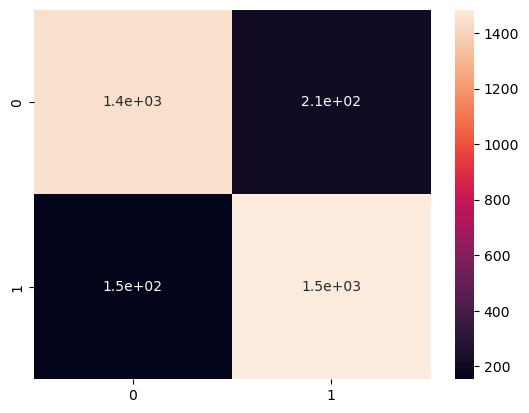

In [81]:
#training

print("Accuracy =",accuracy_score(ytrain,ypred_train))
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True)
print(classification_report(ytrain,ypred_train))

Accuracy = 0.8555825242718447
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       402
           1       0.88      0.83      0.85       422

    accuracy                           0.86       824
   macro avg       0.86      0.86      0.86       824
weighted avg       0.86      0.86      0.86       824



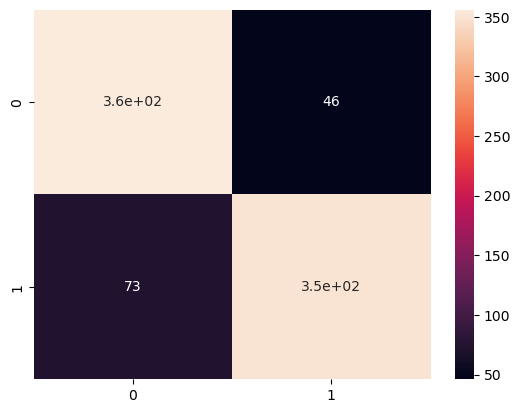

In [82]:
#testing
ypred_test = Adab_clf_model.predict(xtest)
print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True)
print(classification_report(ytest,ypred_test))

In [83]:
Adab_clf_model = AdaBoostClassifier(random_state=10)

hyp = {
    "n_estimators"  :np.arange(10,200),
    "learning_rate" : np.array([0.01,0,0.1,1])
}

RScv_Adab_clf_model = RandomizedSearchCV(Rf_clf_model,HyperP, cv = 6)
RScv_Adab_clf_model.fit(xtrain,ytrain)
RScv_Adab_clf_model.best_estimator_



RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=8, min_samples_split=17,
                       n_estimators=32)

In [88]:
Adab_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)
Adab_clf

AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)

In [89]:
Adab_clf.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)

In [90]:
# Testing Data Evaluation
ypred = Adab_clf.predict(xtest)

cnf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest, ypred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest, ypred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[352  50]
 [ 76 346]]
************************************************************
Accuracy : 0.8470873786407767
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       402
           1       0.87      0.82      0.85       422

    accuracy                           0.85       824
   macro avg       0.85      0.85      0.85       824
weighted avg       0.85      0.85      0.85       824



In [91]:
# Training Data Evaluation
y_pred_train = Adab_clf.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytrain, y_pred_train)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytrain, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[1423  234]
 [ 170 1467]]
************************************************************
Accuracy : 0.8773527625986642
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1657
           1       0.86      0.90      0.88      1637

    accuracy                           0.88      3294
   macro avg       0.88      0.88      0.88      3294
weighted avg       0.88      0.88      0.88      3294

